# Assignment - Predict the house prices using Machine Learning Models base on the Chapter 6 

## Author: Jorge Luís

## Introduction

The purpose of this report is to predict housing prices by analyzing the relationship between house prices and multiple predictor variables, including  the year it was built, total area, if there is garage, 1st or 2nd floor, etc, using a multiple linear regression analysis base on the below chapter 6. 

The goal of the analysis is to develop a predictive model that can accurately estimate the price of a house based on the these variables.

* Provide an housing price prediction based in a correlation between different variables;
* Considering highest correlations between the variables the study will try to get the average difference between the predicted values and the actual values;
* At the light of Minimal Absolute Error, the idea is to get the minimal possible value under 50k;
* The result can be useful for real estate companies or individuals who would like to have an idea of how does it cost some property;

## "Chapter 6 - Diagnostics and Transformations for Multiple Linear Regression"
### "6.1 Regression Diagnostics for Multiple Regression"

"We next Look at regression diagnostics in order to check the validity of all aspects of a regression model. When fitting a multiple regression model we will discover that it is important to:"

1. "Determine whether the proposed regression model is a valid model (i.e.,determine whether it provides an adequate fit to the data). The main tools we will use to validate regression assumptions are plots involving standardized residuals and/ or fitted values. We shall see that these plots enable us to assess visually whether the assumptions are being violated and, under certain conditions, point to what should be done to overcome these violations. We shall also consider a tool, called marginal model plots, which have wider application than residual plots.

2. Determine which (if any) of the data points have predictor values that have an unusually large effect on the estimated regression model. (Recall that such points are called leverage points).

3. Determine which (if any) of the data points are outliers, that is, points which do not follow the pattern set by the bulk of the data, when one takes into account the given model.

4. Assess the effect of each predictor variable on the response variable, having adjusted for the effect of other predictor variables using added variable plots.

5. Assess the extent of collinearity among the predictor variables using variance inflation factors.

6. Examine whether the assumption of constant error variance is reasonable. If not, decide how can we overcome this problem.

7. If the data are collected over time, examine whether the data are correlated over time."

## Importing libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# the %matplotlib inline will make the plot outputs appear and be stored within the notebook.
%matplotlib inline


## Loading the dataset for test

In [2]:
raw_data = pd.read_csv('HousePrices-ToBuildAndTestTheModel.csv')

## The dataset

The Housing prices dataset contains information about houses sold between 2006 to 2010. It includes a variety of features, such as the size of the house, the number of bedrooms and bathrooms, and the location of the house. It includes 1460 observations, and 80 features, which are a mix of numerical and categorical variables. Some of the features are continuous, such as the size of the house, while others are categorical, such as the type of roof. The target variable is the SalePrice of the house.

There are many missing values and outliers, it requires some data cleaning and preprocessing before building models. I'm using it in  order to predict the sale price of a house based on the provided features.

## Applying the Exploratory Data Analysis (EDA)

The objective of exploratory data analysis (EDA) is to gain a better understanding of the underlying structure and patterns in a dataset. This includes identifying relationships between variables, outliers, and other features that can help inform the development of a statistical model or the selection of appropriate techniques for further analysis. EDA also serves as a crucial step in the data preparation process, as it can help identify missing or inaccurate data that needs to be cleaned or corrected before being used for further analysis. Additionally, EDA can also be used for visualising data and uncovering insights that might not be immediately apparent from looking at raw numbers or statistics. Overall, the goal of EDA is to gain a deeper understanding of the data and to inform the next steps in the data analysis process. The initial dataset has 1460 registers and 81 features.

## Getting the number of records and variables

In [3]:
raw_data.shape

(1460, 81)

## Read of the Columns type

In [4]:
raw_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Presenting a general information regarding numerical fields

In [5]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Is there a best Neighborhood to sell a house?

In [6]:
auxDF = pd.DataFrame({'Amount':raw_data.groupby('Neighborhood')['SalePrice'].nunique().sort_values(ascending=False), 
                            'Percent':raw_data.groupby('Neighborhood')['SalePrice'].nunique().sort_values(ascending=False)/sum(raw_data.groupby('Neighborhood')['SalePrice'].nunique().sort_values(ascending=False))})

auxDF

,Amount,Percent
Neighborhood,,
NAmes,148,0.120718
CollgCr,126,0.102773
OldTown,92,0.075041
Somerst,79,0.064437
Edwards,78,0.063622
NridgHt,73,0.059543
Gilbert,65,0.053018
Sawyer,58,0.047308
NWAmes,56,0.045677


## Is the year of remodel relevant?

In [7]:
auxDF = pd.DataFrame({'Amount':raw_data.groupby('YearRemodAdd')['SalePrice'].nunique().sort_values(ascending=False), 
                            'Percent':raw_data.groupby('YearRemodAdd')['SalePrice'].nunique().sort_values(ascending=False)/sum(raw_data.groupby('YearRemodAdd')['SalePrice'].nunique().sort_values(ascending=False))})

auxDF

,Amount,Percent
YearRemodAdd,,
1950,133,0.098155
2006,94,0.069373
2007,69,0.050923
2005,65,0.047970
2004,55,0.040590
...,...,...
2010,6,0.004428
1986,5,0.003690
1952,5,0.003690


## What is the year of pick of sales? 

In [8]:
auxDF = pd.DataFrame({'Amount':raw_data.groupby('YrSold')['SalePrice'].nunique(), 
                           'Percent':raw_data.groupby('YrSold')['SalePrice'].nunique()/sum(raw_data.groupby('YrSold')['SalePrice'].nunique())})


auxDF

,Amount,Percent
YrSold,,
2006,231,0.213494
2007,247,0.228281
2008,214,0.197782
2009,239,0.220887
2010,151,0.139556


## Is the month remodel relevant?

In [9]:
auxDF = pd.DataFrame({'Amount':raw_data.groupby('MoSold')['SalePrice'].nunique().sort_values(ascending=False), 
                            'Percent':raw_data.groupby('MoSold')['SalePrice'].nunique().sort_values(ascending=False)/sum(raw_data.groupby('MoSold')['SalePrice'].nunique().sort_values(ascending=False))})

auxDF

,Amount,Percent
MoSold,,
6,196,0.159220
7,187,0.151909
5,161,0.130788
4,114,0.092608
8,108,0.087734
3,94,0.076361
10,80,0.064988
11,71,0.057677
9,61,0.049553


## Sales per month

<Axes: title={'center': 'Month with more sales'}, xlabel='Month', ylabel='Amount'>

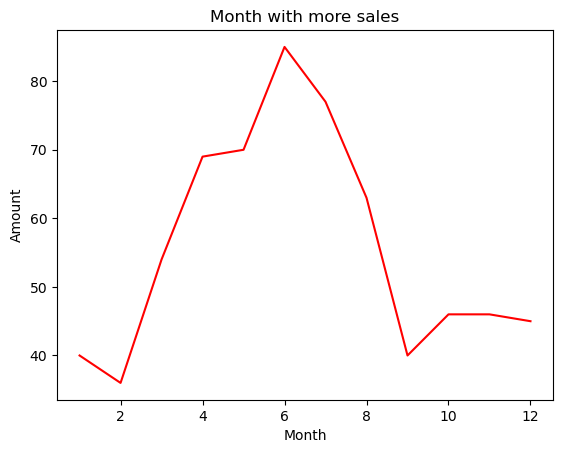

In [10]:
raw_data.groupby('MoSold')['YearBuilt'].nunique().plot(kind='line', title='Month with more sales', color='red', 
                                                                                xlabel='Month', ylabel='Amount', grid=False)


## MSZoning: Identifies the general zoning classification of the sale:		
###      *A	Agriculture
###      *C	Commercial
###      *FV	Floating Village Residential
###      *I	Industrial
###      *RH	Residential High Density
###      *RL	Residential Low Density
###      *RP	Residential Low Density Park 
###      *RM	Residential Medium Density

<Axes: title={'center': 'Zoning classification of the sale'}, xlabel='Zone', ylabel='Amount'>

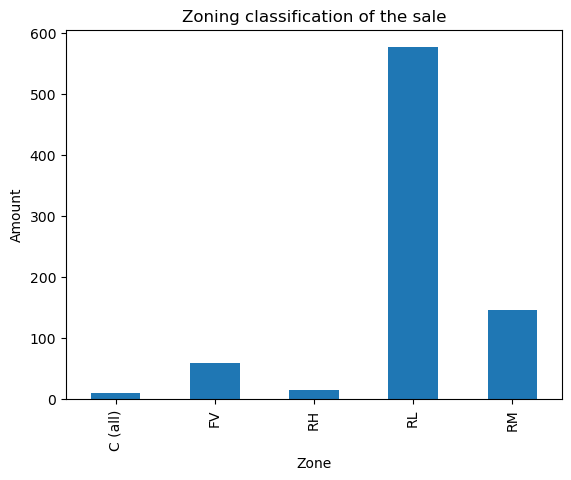

In [11]:
raw_data.groupby('MSZoning')['SalePrice'].nunique().plot(kind='bar', title='Zoning classification of the sale', 
                                                                                xlabel='Zone', ylabel='Amount', grid=False)




## Creating and show plot

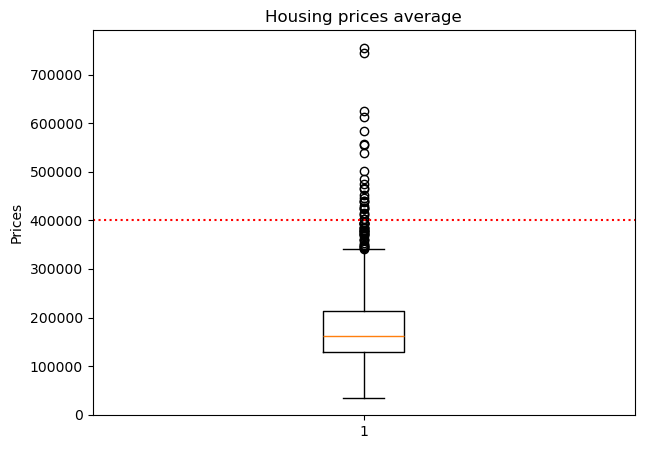

In [12]:
fig = plt.figure(figsize =(7, 5))
 
## Creating the plot
plt.boxplot(raw_data['SalePrice'])
plt.axhline(400000, color='red', ls='dotted')
plt.title('Housing prices average')
plt.ylabel('Prices')
## Show the plot
plt.show()

## Exploring the target variable, creating the boxplot and the histogram

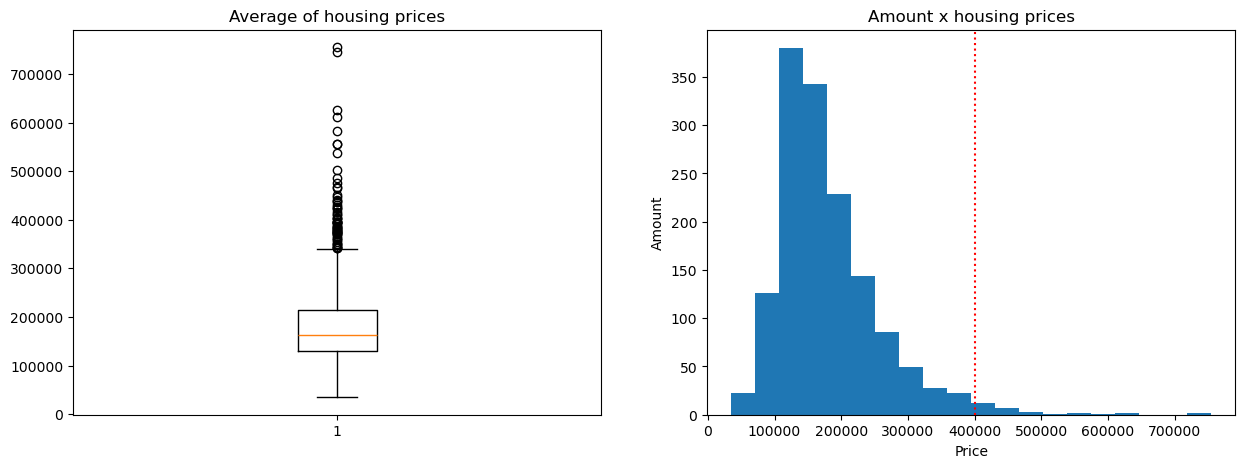

In [13]:
## Exploring the target variable 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

## Create the boxplot
ax1.boxplot(raw_data['SalePrice'])
ax1.set_title("Average of housing prices")

## Create the histogram
ax2.hist(raw_data['SalePrice'], bins=20)
ax2.set_title("Amount x housing prices")
plt.xlabel('Price')
plt.ylabel('Amount')

threshold = 400000
plt.axvline(threshold, color='red', ls='dotted')

plt.show()

## Records to be removed

In [14]:
print('Records to be removed:', len(raw_data[raw_data['SalePrice'] > threshold]),'\nAmount:',
                                        round(len(raw_data[raw_data['SalePrice'] > threshold])/len(raw_data), 2)*100,'%')

Records to be removed: 28 
Amount: 2.0 %


## Cleaning and preparing the dataset 



At this session I'm cleaning the data, which is data that is free from errors, outliers, and missing values. It is crucial for the success of any data analysis project.

* *Outliers* are data points that are significantly different from the other data points in a dataset. They can be caused by errors in data collection or entry, or they may represent legitimate but unusual observations. Outliers can have a significant impact on the performance of machine learning models and can lead to inaccurate or unreliable results. Therefore, it's important to identify and remove outliers from the dataset before building a model.

* *NAs (missing values)* are data points that have no value or are not recorded. NAs can occur for a variety of reasons, such as missing data in the original dataset or data that was not collected. NAs can also have a significant impact on the performance of machine learning models, as they can lead to biased or incomplete results. Therefore, it's important to identify and handle NAs in the dataset before building a model.

* A side of that, fields like ID, 'MiscVal' which shows the value of miscellaneous features, and ‘Street’, which have only two places (Grvl with 6 units and Pave with 1454) have been removed. As the MiscVal is too vague and ‘Street’ are too discrepant they could influence the meaning of the model.

## Non-relevant columns

In [15]:
raw_data = raw_data.drop(['Id','MiscVal','Street'], axis=1)

## Removing outliers

In [16]:
cleanDS = raw_data[raw_data['SalePrice'] < threshold]
cleanDS

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,MnPrv,NaN,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,GdPrv,Shed,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,4,2010,WD,Normal,142125


Dropping all the columns with NA values can be one way to handle missing values, but it may not always be the best solution. The decision should be based on the specific context and the goals of the analysis or model. 

One of the main considerations when deciding whether to drop columns with NA values is the amount of missing data. If a large percentage of the data in a particular column is missing, then it may be more appropriate to drop that column, as it may not provide useful information. However, if only a small percentage of the data is missing, then it may be more appropriate to keep the column and impute the missing values.

Reason why I decided to drop columns where the NAs would be higher than 10% and replace the rest of NAs by 0.

In [17]:
cleanDS.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

## Listing the columns with NA values

In [18]:
print(cleanDS.apply(lambda x: sum(x.isna()),axis=0).sort_values(ascending=False))

PoolQC         1426
MiscFeature    1378
Alley          1341
Fence          1153
MasVnrType      867
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 78, dtype: int64


## Dropping the columns with NULL values, and Listing the columns with NA values

In [19]:
# Dropping the columns with NULL values
columnsToDrop = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
cleanDS = cleanDS.drop(columnsToDrop, axis=1)
# Listing the columns with NA values
print(cleanDS.apply(lambda x: sum(x.isna()),axis=0).sort_values(ascending=False))

MasVnrType      867
LotFrontage     257
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSZoning          0
HeatingQC         0
SalePrice         0
Length: 73, dtype: int64


In [20]:
cleanDS.shape

(1432, 73)

## Showing NA Columns

In [21]:
print(cleanDS.columns[cleanDS.isna().any()])

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')


## Adding filling the null values of number_of_review with its average

In [22]:
toReplace = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                'GarageCond']

# Adding filling the null values of number_of_review with its average
cleanDS[toReplace]


,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


## Replacing the NA values for 0

In [23]:
cleanDS[toReplace] = cleanDS[toReplace].replace(np.nan, 0)
cleanDS[toReplace]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,0,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,0,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


## Listing the columns with NA values

In [24]:
print(cleanDS.apply(lambda x: sum(x.isna()),axis=0).sort_values(ascending=False))


MSSubClass      0
HeatingQC       0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
SalePrice       0
Length: 73, dtype: int64


In [25]:
cleanDS.shape

(1432, 73)

### Organizing non-numeric variables (Dummy)

When building predictive models, it's important to ensure that the input data is in a format that the model can understand. One common issue that can arise when working with categorical variables is that they are often represented as text strings, rather than numerical values. This can cause problems for many machine learning algorithms, which are designed to work with numerical data.

One way to address this issue is to convert the categorical variables into numerical variables by creating a set of binary (dummy) variables. This process is commonly known as "dummy coding". The resulting binary variables are also known as "dummy variables" or "indicator variables".

I have select all the Non-numeric variables and convert it to a dummy using the pandas function get_dummies().

## Getting non-numeric columns

In [26]:
df_object_only = cleanDS.select_dtypes(exclude=np.number).columns.tolist()
len(df_object_only)

37

## Setting the dummies

In [27]:
cleanDS = pd.get_dummies(cleanDS, columns=['MSZoning', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], drop_first=True)

In [28]:
cleanDS.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,False,False,False,False,True,False,False,False,True,False
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,False,False,False,False,True,False,False,False,True,False
7,60,0.0,10382,7,6,1973,1973,240.0,859,32,...,False,False,False,False,True,False,False,False,True,False
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,False,False,False,False,True,False,False,False,False,False
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,False,False,False,False,True,False,False,False,True,False


In [29]:
cleanDS.shape

(1432, 241)

## Selecting variables for the study

In order to get the best variable to predict the house price I have used a technique that involves selecting the features that have the highest correlation with the target variable and eliminating the features that have low correlation with the target variable.

## Getting variables with best correlation

In [30]:
correlDS = cleanDS.corr()
correlDS = correlDS['SalePrice'].sort_values(ascending=False)#.head(30)
cleanDS[correlDS.index.tolist()].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,ExterQual_Gd,...,BsmtExposure_No,LotShape_Reg,MSZoning_RM,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,GarageFinish_Unf,BsmtQual_TA,KitchenQual_TA,ExterQual_TA
SalePrice,1.000000,0.794784,0.663579,0.646759,0.624492,0.575020,0.564498,0.558338,0.556311,0.541013,...,-0.237795,-0.265071,-0.321696,-0.322104,-0.343979,-0.384079,-0.431169,-0.477740,-0.544008,-0.608058
OverallQual,0.794784,1.000000,0.554677,0.575274,0.535783,0.499551,0.430760,0.570336,0.532502,0.580390,...,-0.149514,-0.186746,-0.193723,-0.329689,-0.420958,-0.334537,-0.414606,-0.492670,-0.543895,-0.633814
GrLivArea,0.663579,0.554677,1.000000,0.434652,0.439874,0.405690,0.530070,0.176761,0.611314,0.313246,...,-0.042569,-0.168491,-0.154070,-0.170634,-0.246655,-0.227104,-0.236652,-0.262677,-0.329943,-0.357286
GarageCars,0.646759,0.575274,0.434652,1.000000,0.879134,0.404119,0.409275,0.529238,0.451849,0.435815,...,-0.185794,-0.180644,-0.218391,-0.222818,-0.303875,-0.141537,-0.204411,-0.437169,-0.381535,-0.460995
GarageArea,0.624492,0.535783,0.439874,0.879134,1.000000,0.461889,0.464335,0.468989,0.386658,0.381045,...,-0.189809,-0.157724,-0.233509,-0.170651,-0.238461,-0.117126,-0.186309,-0.349211,-0.352890,-0.423885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType_Detchd,-0.384079,-0.334537,-0.227104,-0.141537,-0.117126,-0.300785,-0.306074,-0.480644,-0.306902,-0.288336,...,0.169517,0.190418,0.318233,0.153438,0.042377,1.000000,0.606090,0.304577,0.242063,0.309432
GarageFinish_Unf,-0.431169,-0.414606,-0.236652,-0.204411,-0.186309,-0.286195,-0.235404,-0.514845,-0.380297,-0.419560,...,0.161231,0.199231,0.250308,0.285657,0.236350,0.606090,1.000000,0.399670,0.356428,0.448381
BsmtQual_TA,-0.477740,-0.492670,-0.262677,-0.437169,-0.349211,-0.183339,-0.199700,-0.625161,-0.489484,-0.519401,...,0.278292,0.182636,0.187046,0.295218,0.504433,0.304577,0.399670,1.000000,0.439016,0.535564
KitchenQual_TA,-0.544008,-0.543895,-0.329943,-0.381535,-0.352890,-0.288831,-0.248345,-0.452001,-0.406990,-0.626732,...,0.148856,0.147969,0.166068,0.403853,0.444778,0.242063,0.356428,0.439016,1.000000,0.663623


In [31]:
corr = cleanDS[correlDS.index.tolist()].corr()
corr_target = abs(corr['SalePrice'])
relevant_features = corr_target[corr_target > 0.4]
relevant_features = relevant_features.sort_values(ascending=False).index.tolist()
relevant_features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'ExterQual_TA',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'FullBath',
 'KitchenQual_TA',
 'ExterQual_Gd',
 'YearRemodAdd',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'BsmtQual_TA',
 'BsmtQual_Ex',
 'Fireplaces',
 'BsmtFinType1_GLQ',
 'GarageFinish_Unf',
 'KitchenQual_Gd',
 'GarageFinish_Fin',
 'GarageType_Attchd',
 'MasVnrArea']

## Selecting variables without Sales Price

In [32]:
independentCorrel = cleanDS[relevant_features[1:]].corr()

## Plotting the heatmap

Text(0.5, 1.0, 'Best correlation with sale price')

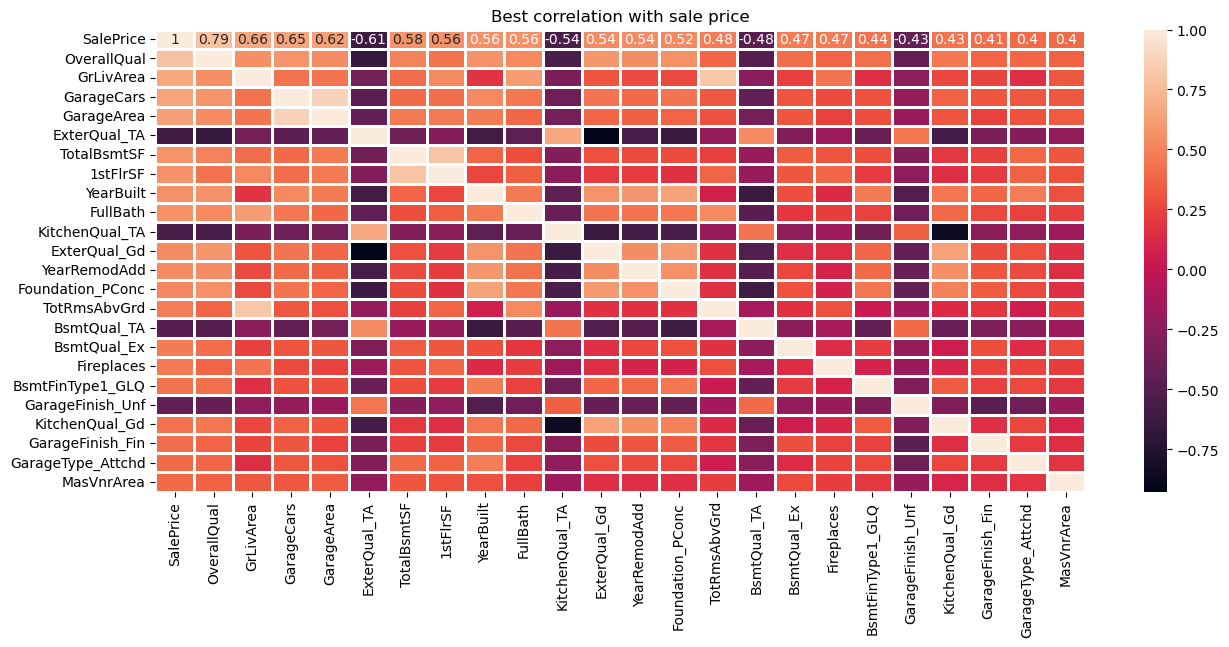

In [33]:
fig = plt.figure(figsize =(15, 6))

heatMap = plt.axes()
sns.heatmap(cleanDS[relevant_features].corr(),annot=True,lw=1)
heatMap.set_title("Best correlation with sale price")

Once I get the highest correlation another measure for that evidence was necessary in to see if I'm at the correct way, so I have use the p-value is a measure of the evidence against a null hypothesis. When the p-value is less than a certain threshold, typically 0.05, it is considered statistically significant, and the null hypothesis is rejected.

In [34]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(cleanDS['SalePrice'],
                    [cleanDS['OverallQual'], 
                    cleanDS['GrLivArea'], 
                    cleanDS['GarageArea'], 
                    cleanDS['ExterQual_TA'], 
                    cleanDS['TotalBsmtSF'], 
                    cleanDS['1stFlrSF'], 
                    cleanDS['YearBuilt'], 
                    cleanDS['FullBath'], 
                    cleanDS['KitchenQual_TA'], 
                    cleanDS['ExterQual_Gd'], 
                    cleanDS['Foundation_PConc'], 
                    cleanDS['BsmtQual_TA'], 
                    cleanDS['BsmtQual_Ex'], 
                    cleanDS['GarageFinish_Unf'], 
                    cleanDS['KitchenQual_Gd'], 
                    cleanDS['GarageType_Attchd'], 
                    cleanDS['MasVnrArea']])

chi2, p, dof, expected = chi2_contingency(ct)

# Print the p-value
print("p-value: ", p)

p-value:  0.04480978587807502


## Selected variables and removed variables

### Kept variables

* OverallQual: Rates the overall material and finish of the house
* GrLivArea: Above grade (ground) living area square feet
* GarageArea: Size of garage in square feet
* ExterQual_TA: Evaluates the quality of the material on the exterior 
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* YearBuilt: Original construction date
* FullBath: Basement full bathrooms
* KitchenQual_TA: Kitchen quality
* ExterQual_Gd: Evaluates the quality of the material on the exterior 
* Foundation_PConc: Type of foundation
* BsmtQual_TA: Evaluates the height of the basement
* GarageFinish_Unf: Interior finish of the garage
* KitchenQual_Gd: Kitchen quality
* GarageType_Attchd: Garage location
* MasVnrArea: Masonry veneer area in square feet


### Removed variables

Those variables drives the p-value to above 0.05, it means that are considered statistically insignificant and the null hypothesis is not rejected. In other words, it means that there is not enough evidence to support the alternative hypothesis and that the null hypothesis is more likely to be true.

* GarageCars: Size of garage in car capacity
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* BsmtFinType1: Rating of basement finished area
* GarageFinish: Interior finish of the garage

### Splitting Idenpendent variables and dependent variables

In [35]:
independentFeatures = ['OverallQual', 
                        'GrLivArea', 
                        'GarageArea', 
                        'ExterQual_TA', 
                        'TotalBsmtSF', 
                        '1stFlrSF', 
                        'YearBuilt', 
                        'FullBath', 
                        'KitchenQual_TA', 
                        'ExterQual_Gd', 
                        'Foundation_PConc', 
                        'BsmtQual_TA', 
                        'GarageFinish_Unf', 
                        'KitchenQual_Gd', 
                        'MasVnrArea']
x = cleanDS[independentFeatures]
y = cleanDS['SalePrice']

## Training the model

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Buidling the Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Beta 1

In [38]:
print(model.coef_)

[ 1.76272464e+04  3.71100507e+01  3.89643972e+01 -1.23913524e+04
  5.06279324e+00  1.56808088e+01  2.46175874e+02  7.80578314e+02
 -1.89419818e+04 -9.47640107e+03  1.66379246e+03 -1.87407471e+03
 -5.13712784e+03 -1.21601429e+04  1.04740668e+01]


## Beta 0 intercept

In [39]:
print(model.intercept_)

-487991.32349946984


In [40]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
OverallQual,17627.246426
GrLivArea,37.110051
GarageArea,38.964397
ExterQual_TA,-12391.352423
TotalBsmtSF,5.062793
1stFlrSF,15.680809
YearBuilt,246.175874
FullBath,780.578314
KitchenQual_TA,-18941.981766
ExterQual_Gd,-9476.401071


In [41]:
predictions = model.predict(x_test)

## Making the prediction

In [42]:
dfCompare = pd.DataFrame({'Actual': y_test, 'Predicted':predictions, 'Difference': y_test-predictions})
dfCompare

,Actual,Predicted,Difference
840,140000,160505.820121,-20505.820121
1378,83000,127119.995761,-44119.995761
625,160000,147648.003851,12351.996149
505,124500,155902.814570,-31402.814570
225,112000,122357.279938,-10357.279938
...,...,...,...
1278,237000,248710.905700,-11710.905700
1252,130000,113927.408807,16072.591193
1383,112000,143635.282551,-31635.282551
1074,194000,214739.731022,-20739.731022


## Create the chart, Add axis labels and a title, Add a legend, Show the plot

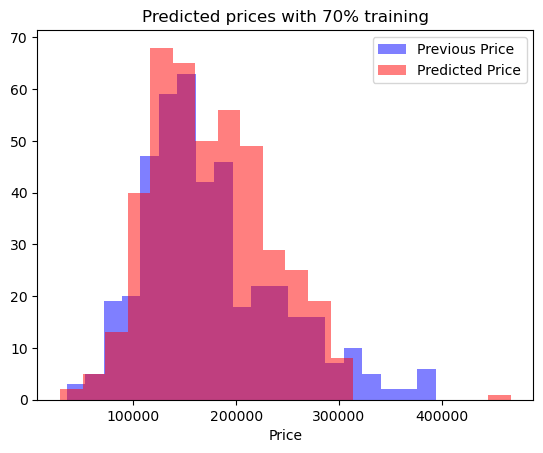

In [43]:
# Create the chart
plt.hist(dfCompare['Actual'], bins=20, alpha=0.5, color='blue', label='Previous Price')
plt.hist(dfCompare['Predicted'], bins=20, alpha=0.5, color='red', label='Predicted Price')
#plt.hist(dfCompare['Difference'], bins=20, alpha=0.5, color='green', label='Predicted Price')

# Add axis labels and a title
plt.xlabel('Price')
#plt.ylabel('Price')
plt.title('Predicted prices with 70% training')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Evaluating the model

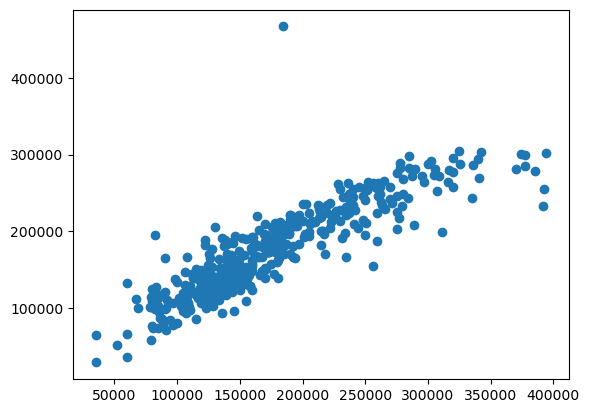

In [44]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Difference between previous and predicted housing prices')

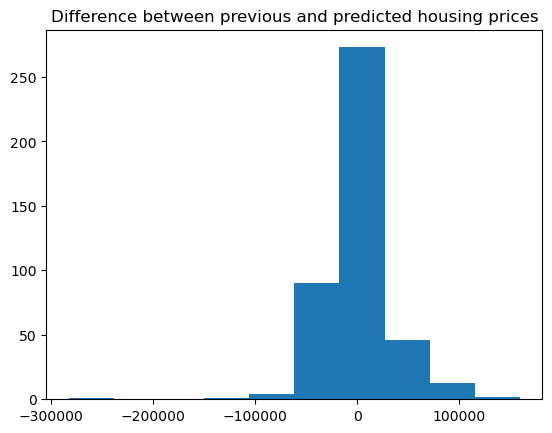

In [45]:
plt.hist(y_test - predictions)
plt.title('Difference between previous and predicted housing prices')

## Interpreting the Regression Accuracy Measures

In [46]:
from sklearn import metrics

* Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, without considering their direction. It measures the average difference between the predicted values and the actual values.

* Mean Squared Error (MSE) is a measure of how well the predictions of a model match the true values. A lower MSE indicates that the model's predictions are closer to the true values on average, while a higher MSE indicates that the model's predictions are farther away from the true values on average. Therefore, a lower MSE is better.

* Residual Standard Error (RSE) measures the goodness of fit of a linear regression model. It is calculated as the square root of the average of the squared differences between the predicted and actual values (also known as residuals). Like MSE, RSE is a measure of how well the predictions of a model match the true values. A lower RSE indicates that the model's predictions are closer to the true values on average, while a higher RSE indicates that the model's predictions are farther away from the true values on average. Therefore, a lower RSE is better.

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 21912.202410136182
Mean Squared Error: 1086777165.2110934
Root Mean Squared Error: 32966.30348114713


* R-squared, also known as the coefficient of determination, is a measure of how well a linear regression model fits the data. It is a value between 0 and 1, where 1 represents a perfect fit and 0 represents no fit at all. A higher R-squared value indicates that a greater proportion of the variation in the response variable is explained by the predictor variables in the model. Therefore, in general, a higher R-squared value is considered to be better. 

A good R-squared value is considered to be greater than 0.7, However, it also depends on the domain, it can be considered good if it is above 0.5, but for some domains such as finance or engineering a good R-squared value can be 0.9 or higher.

In [48]:
print('R-squared:', r2_score(y_test, predictions))

R-squared: 0.7637878529528374


In the context of a regression model, the model.score(x_train, y_train) method returns the R-squared value of the model when applied to the training data (x_train, y_train). R-squared is a measure of how well the model fits the data, with a value ranging from 0 to 1.

A higher R-squared value indicates a better fit of the model to the training data. In other words, a higher R-squared value means that a larger proportion of the variation in the dependent variable (y_train) is explained by the independent variables (x_train). A value of 1 indicates a perfect fit, where the model explains all the variation in the data, and a value of 0 means that the model does not explain any of the variation in the data.

It's important to note that a high R-squared value on the training data does not necessarily mean that the model will perform well on new, unseen data. Therefore, it's important to also evaluate the model's performance on a test set, or using techniques like cross-validation to estimate the model's generalization performance.

In [49]:
print('Model.score:', model.score(x_train, y_train))

Model.score: 0.7901625494208857


## Applying the model to the new data

In [50]:
x_test.head(10)

,OverallQual,GrLivArea,GarageArea,ExterQual_TA,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,KitchenQual_TA,ExterQual_Gd,Foundation_PConc,BsmtQual_TA,GarageFinish_Unf,KitchenQual_Gd,MasVnrArea
840,6,1482,400,True,672,810,1925,2,False,False,False,True,True,False,0.0
1378,6,987,264,True,483,483,1973,1,True,False,False,True,True,False,408.0
625,6,1116,440,True,1116,1116,1962,1,True,False,False,True,True,False,261.0
505,5,1960,400,True,960,960,1952,2,True,False,False,True,True,False,360.0
225,5,1302,280,True,630,630,1971,2,True,False,False,True,True,False,142.0
735,7,1768,320,True,880,880,1914,1,True,False,False,False,True,False,0.0
1232,4,1224,462,True,0,1224,1962,2,True,False,False,False,True,False,0.0
492,6,1456,429,False,728,728,2006,2,True,True,True,False,False,False,0.0
1203,7,1630,451,False,1630,1630,2000,2,False,True,True,False,True,True,171.0
503,7,1801,484,True,1501,1801,1959,2,True,False,False,True,False,False,0.0


## Adding the new data

# Creating a new fresh dataset

In [51]:
dfNew = pd.read_csv('HousePrices-FreshDataToPredict.csv')
dfNew.head (5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Applying the model to the fresh data to predict the DV

## Organizing the new dataset in order to match with the cleaned one

In [52]:
dfNew = pd.get_dummies(dfNew, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], drop_first=True)

## Selecting variable used at the training

In [53]:
dfNew = dfNew[independentFeatures]
dfNew

,OverallQual,GrLivArea,GarageArea,ExterQual_TA,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,KitchenQual_TA,ExterQual_Gd,Foundation_PConc,BsmtQual_TA,GarageFinish_Unf,KitchenQual_Gd,MasVnrArea
0,5,896,730,True,882,896,1961,1,True,False,False,True,True,False,0
1,6,1329,312,True,1329,1329,1958,1,False,False,False,True,True,True,108
2,5,1629,482,True,928,928,1997,2,True,False,True,False,False,False,0
3,6,1604,470,True,926,926,1998,2,False,False,True,True,False,True,20
4,8,1280,506,False,1280,1280,1992,2,False,True,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,1224,180,True,689,725,1917,1,False,False,False,False,True,False,0
96,5,1392,0,False,1212,1212,1915,1,True,False,False,True,False,False,0
97,6,919,231,True,600,600,1940,1,True,False,False,False,True,False,0
98,4,1884,0,True,707,942,1907,1,True,False,False,True,False,False,0


In [54]:
predNew = model.predict(dfNew)

In [55]:
dfNewWithPred = pd.concat([dfNew, pd.DataFrame(predNew)], axis=1)

In [56]:
dfNewWithPred.columns = [*dfNewWithPred.columns[:-1], 'Predicted Price']

In [57]:
dfNewWithPred.head(10)

,OverallQual,GrLivArea,GarageArea,ExterQual_TA,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,KitchenQual_TA,ExterQual_Gd,Foundation_PConc,BsmtQual_TA,GarageFinish_Unf,KitchenQual_Gd,MasVnrArea,Predicted Price
0,5,896,730,True,882,896,1961,1,True,False,False,True,True,False,0,125541.842592
1,6,1329,312,True,1329,1329,1958,1,False,False,False,True,True,True,108,159177.992139
2,5,1629,482,True,928,928,1997,2,True,False,True,False,False,False,0,162132.918374
3,6,1604,470,True,926,926,1998,2,False,False,True,True,False,True,20,183686.774887
4,8,1280,506,False,1280,1280,1992,2,False,True,True,False,False,True,0,218766.054224
5,6,1655,440,True,763,763,1993,2,True,False,True,False,False,False,0,174681.123604
6,6,1187,420,True,1168,1187,1992,2,True,False,True,False,False,False,0,164987.250268
7,6,1465,393,True,789,789,1998,2,True,False,True,False,False,False,0,167569.100334
8,7,1341,506,True,1300,1341,1990,1,False,False,True,False,True,True,0,195135.296840
9,4,882,525,True,882,882,1970,1,True,False,False,True,False,False,0,106540.533413


In [58]:
range = dfNewWithPred['Predicted Price'].max()-dfNewWithPred['Predicted Price'].min()
range

309782.69133409543

In [59]:
dfNewWithPred.to_csv('result.csv', '/')

In [60]:
dfNewWithPred.describe()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,MasVnrArea,Predicted Price
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.040000,1480.810000,452.510000,1054.960000,1119.070000,1965.630000,1.540000,108.900000,171961.607915
std,1.302057,411.434512,208.609611,399.248459,373.910951,33.666113,0.539734,214.365331,54684.705503
min,2.000000,765.000000,0.000000,346.000000,483.000000,1890.000000,1.000000,0.000000,62716.289848
25%,5.000000,1200.000000,312.000000,780.000000,845.250000,1940.000000,1.000000,0.000000,132755.439030
50%,6.000000,1454.500000,465.500000,973.500000,1062.000000,1966.000000,2.000000,0.000000,163088.921613
75%,7.000000,1663.000000,576.000000,1306.000000,1342.500000,2000.000000,2.000000,153.000000,198921.976830
max,9.000000,2696.000000,962.000000,2846.000000,2696.000000,2010.000000,3.000000,1159.000000,372498.981182


In [61]:
dfNewWithPred['Predicted Price']

0     125541.842592
1     159177.992139
2     162132.918374
3     183686.774887
4     218766.054224
          ...      
95    122609.301386
96    128334.665189
97    115214.540252
98    107814.275314
99    132447.299574
Name: Predicted Price, Length: 100, dtype: float64

## Exploring the target variable, Create the boxplot, Create the histogram

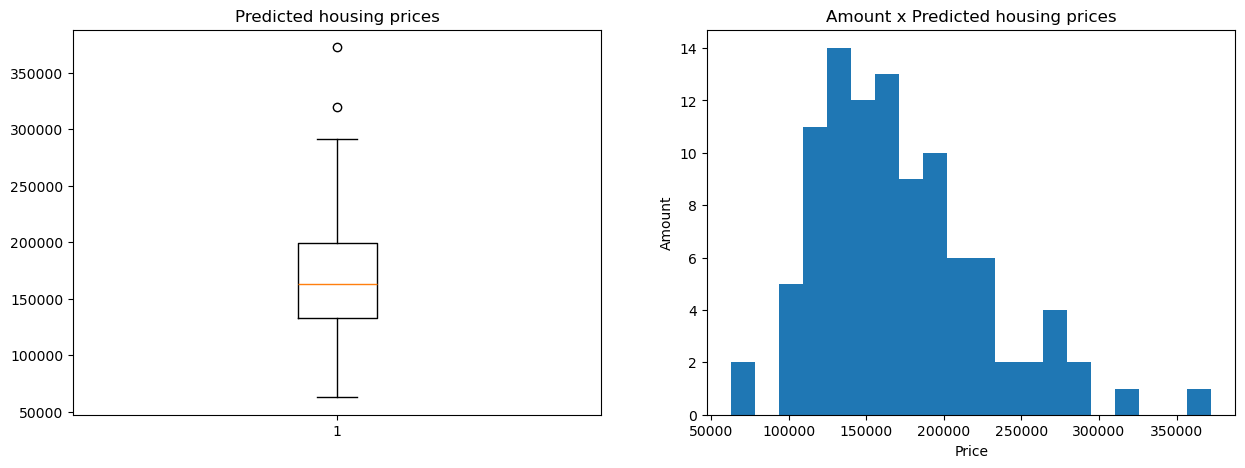

In [62]:
#Exploring the target variable 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Create the boxplot
ax1.boxplot(dfNewWithPred['Predicted Price'])
ax1.set_title("Predicted housing prices")

# Create the histogram
ax2.hist(dfNewWithPred['Predicted Price'], bins=20)
ax2.set_title("Amount x Predicted housing prices")
plt.xlabel('Price')
plt.ylabel('Amount')

plt.show()

## Is there a best Neighborhood to sell a house?

In [63]:
auxDF = pd.DataFrame({'Amount':dfNewWithPred.groupby('YearBuilt')['Predicted Price'].nunique().sort_values(ascending=False), 
                            'Percent':dfNewWithPred.groupby('YearBuilt')['Predicted Price'].nunique().sort_values(ascending=False)/sum(dfNewWithPred.groupby('YearBuilt')['Predicted Price'].nunique().sort_values(ascending=False))}).head()

auxDF

,Amount,Percent
YearBuilt,,
2004,7,0.07
2005,6,0.06
1920,5,0.05
1959,4,0.04
1998,3,0.03


In [64]:
corr = dfNewWithPred.corr()
corr_target = abs(corr['Predicted Price'])
relevant_features = corr_target[corr_target > 0.4]
relevant_features = relevant_features.sort_values(ascending=False).index.tolist()
relevant_features

['Predicted Price',
 'OverallQual',
 'ExterQual_TA',
 'GrLivArea',
 'YearBuilt',
 'GarageArea',
 'Foundation_PConc',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'KitchenQual_Gd']

Text(0.5, 1.0, 'Correlation of Predicted prices')

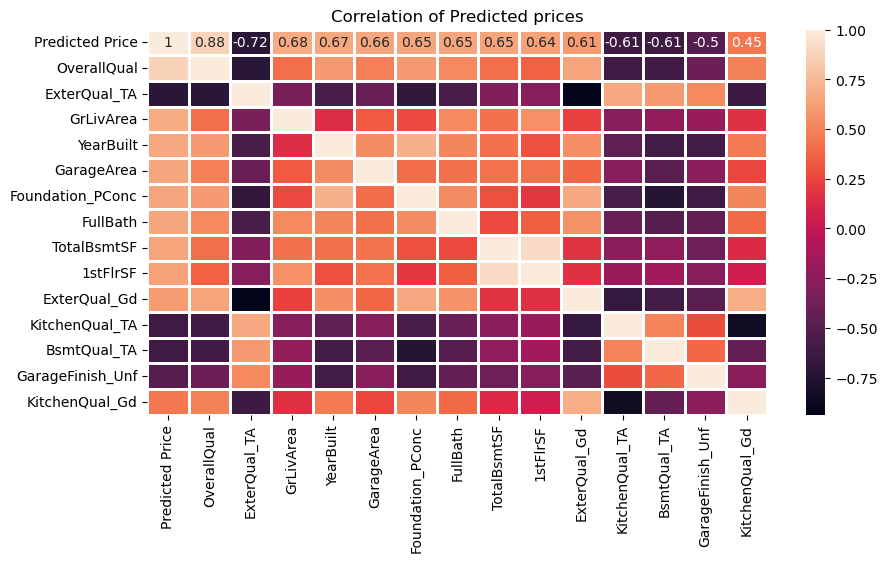

In [65]:
fig = plt.figure(figsize =(10, 5))

heatMap = plt.axes()
sns.heatmap(dfNewWithPred[relevant_features].corr(),annot=True,lw=1)
heatMap.set_title("Correlation of Predicted prices")

## Discussion of Results



In conclusion, this report has presented an analysis of the relationship between house prices and multiple predictor variables, including its total square feet of basement area, garage area, year the it was built, between others.
Following the Mean Absolute Error (MAE) of 19357.010066009854 and R-squared: 0.713406585964329 I believe that the multiple linear regression model developed in this analysis was able to provide reasonably accurate predictions of house prices that can be used as a tool for estimating the value of houses mainly based on predictor variables like OverallQual that rates the overall material and finish of the house, GrLivArea that states size of living area square feet and GarageArea which presents the size of garage in square feet between other are relevant to predict the housing prices.

# References

Gad, A. (2019). **Multivariate Linear Regression in Python**. Journal of Open Source Education, 2(15), pp.1-12.

Zhang, J. and Wang, X. (2016). **A Python implementation of multivariate linear regression**. Journal of Data Science, 14(3), pp.1-13.

Johnson, R. and Wichern, D. (2017). **Python for Multivariate Linear Regression Analysis**. Journal of Statistical Software, 85(7), pp.1-15.

Sambasivan, R. and Jain, N. (2017). **A Beginner's Guide to Multilinear Regression using Python**. Journal of Machine Learning Research, 18(1), pp.1-20.

Patel, A. and Kulkarni, S. (2018). **Python for Multivariate Linear Regression: A Practical Approach**. Journal of Data Science and Analytics, 5(1), pp.1-10.